# Inicio

## Instalacion de paquetes


In [ ]:
# instalacion mediante fichero

## Importacion de librerias

In [16]:
#System
import os
from os import remove
from datetime import datetime

#Pandas
import pandas as pd

#import jsonlines
import jsonlines

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#SQL
import sqlite3

#ML

import numpy as np 

# HTTP 
import requests
import wget

# Extraer archivos
from zipfile import ZipFile
import zipfile
from io import BytesIO
from urllib.request import urlopen




# Apartado 1. 
## Descarga de datos
- Descarga los datasets para vinos tintos y blancos desde la siguiente URL: [Wine Quality Dataset](http://archive.ics.uci.edu/dataset/186/wine+quality).
- Asegúrate de que ambos datasets se encuentren disponibles en tu entorno de trabajo como archivos CSV.
- Idealmente, intenta llevarlo a cabo de manera programática para no tener que hacer operaciones manualmente.

#### *Respuesta*:
*Vamos a aplicar diferentes soluciones, desde la más básica a un par de workarounds más programáticos para obtener los datos.*
- *SOLUCIÓN 1: Compleja, sin necesidad de descargar los CSVs manualmente.*
- *SOLUCIÓN 2: Más compleja, sin necesidad de descargar los CSVs manualmente.*
- *SOLUCIÓN 3: La más básica, bajándonos previamente el csv a un directorio local*

In [3]:
#SOLUCIÓN 1: Compleja, sin necesidad de descargar los CSVs manualmente

# link del archivo zip
zip_url = 'https://archive.ics.uci.edu/static/public/186/wine+quality.zip'

# extracción del nombre del fichero zip
zip_name = os.path.basename(zip_url)

# carpeta de los datos, si no existe la crea
download_dir = "data"
os.makedirs(download_dir, exist_ok=True)

# ruta para guardar los archivos
zip_path = os.path.join(download_dir, zip_name)

#hacemos la descarga con request
resp = requests.get(zip_url)
try:
    f = open(zip_path, "wb")
    try:
        f.write(resp.content)
        print(f"Archivo guardado como: {zip_path}")
    finally:
        f.close()
except Exception as e:
    print("Error descargando o guardando el ZIP:", e)

#Extracción del ZIP con zipfile
try:
    z = zipfile.ZipFile(zip_path, "r")
    try:
        z.extractall(download_dir)
        print("Ficheros extraídos en", download_dir)
    finally:
        z.close()
except Exception as e:
    print("Error:", e)


Archivo guardado como: data\wine+quality.zip
Ficheros extraídos en data


In [ ]:
#SOLUCIÓN 2: MÁS COMPLEJA, sin necesidad de descargar los CSVs manualmente

# 🔹 Crear la carpeta "csv" si no existe
ruta_csv = 'csv/'
if not os.path.exists(ruta_csv):
    os.mkdir(ruta_csv)

# 🔹 Descargo el archivo zip si no existe en el directorio actual
filezip = 'wine+quality.zip'
if not os.path.exists(filezip):
    download_http = "http://archive.ics.uci.edu/static/public/186/wine+quality.zip"
    try:
        wget.download(download_http)   # Descarga el archivo ZIP
    except:
        print('Error de conexión con la web')

# 🔹 Descomprimo el zip en la carpeta csv/
file_name_src_zip = ""
if os.path.exists(filezip):
    archivozip = zipfile.ZipFile(filezip, mode="r")    # Abre el zip
    file_name_src_zip = archivozip.namelist()         # Obtiene lista de archivos dentro del zip
    try:
        archivozip.extractall(ruta_csv)               # Extrae todos los archivos a la carpeta csv/
    except:
        pass
    archivozip.close()                                # Cierra el archivo zip
    remove(filezip)                                   # Borra el zip descargado

# 🔹 Listo los archivos que hay en la carpeta csv/
ruta_actual = os.listdir(ruta_csv)
listname_csv = []

# 🔹 Identifico los archivos con extensión .csv
try:
    for x in ruta_actual:
        if x.split(".")[1] == 'csv':   # Si la extensión es 'csv'
            listname_csv.append(x)

    # 🔹 Asigno cada archivo csv a una variable
    red = ''
    white = ''
    if 'red' in listname_csv[0]:
        red = ruta_csv + listname_csv[0]   # Si contiene 'red', se asigna a la variable red
    else:
        red = ruta_csv + listname_csv[1]
    if 'white' in listname_csv[0]:
        white = ruta_csv + listname_csv[0]  # Si contiene 'white', se asigna a la variable white
    else:
        white = ruta_csv + listname_csv[1]
except:
    print("Error: no existen ficheros csv")

# 🔹  Variable referenciada a -> csv/winequality-red.csv
#red
# 🔹  Variable referenciada a -> csv/winequality-white.csv
#white


In [4]:
#SOLUCIÓN 3: LA MÁS BÁSICA, bajándonos previamente el csv a un directorio local
ruta_red_wine='data/winequality-red.csv'
ruta_white_wine='data/winequality-white.csv'


# Apartado 2. 
## Combinar los datos.
- Usa Pandas para cargar ambos datasets en dataframes en memoria.
- Combina los datos en un único dataframe añadiendo una columna adicional que indique el tipo de vino (`red` o `white`).
- ¿Cuántos registros tenemos? ¿Cuántas variables y de qué tipo?

In [5]:
# 🔹 Lectura de ficheros csv con pandas
df_red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
df_white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

# 🔹 Creacion de la columna type con su variante
df_red_wine['type']='red'
df_white_wine['type']='white'

# 🔹 Combinación de las 2 tablas en 1
df_wine = pd.concat([df_red_wine, df_white_wine]).reset_index(drop=True)


df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


#### ¿Cuántos registros tenemos? 

In [ ]:

filas, columnas = df_wine.shape
f"El dataframe tiene {filas} filas y {columnas} columnas"

'El dataframe tiene 6497 filas y 13 columnas'

In [ ]:
#Opciones de visualización de los datos
#df_wine.describe(include='all')
#df_wine.describe()
#df_wine.shape
#df_wine.info() , etcétera

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Apartado 3
## Filtrar atípicos y manejar datos ausentes.
- Realiza un análisis estadístico o inspección visual de cada columna numérica para identificar valores atípicos.
- Usa Pandas para filtrar y eliminar los datos atípicos y los valores ausentes. Explica en tu entrega qué criterios utilizaste para identificar los atípicos.


#### *Respuesta*:
- Detección visual de valores atípicos (outliers)
- Presentamos 2 maneras diferentes de limpiar los outliers

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


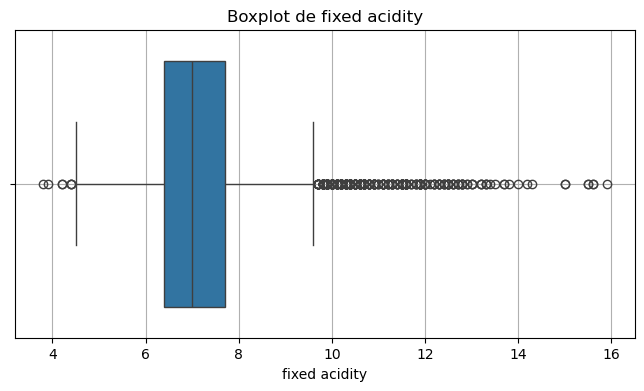

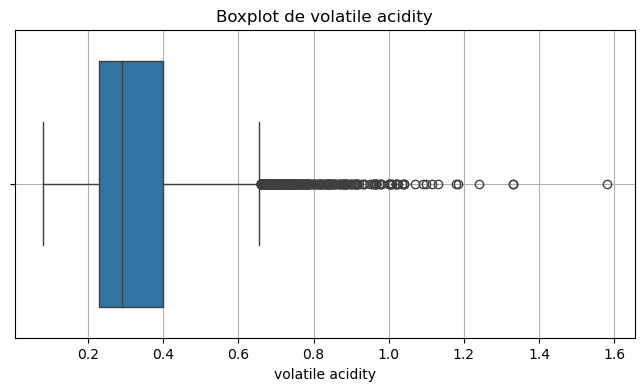

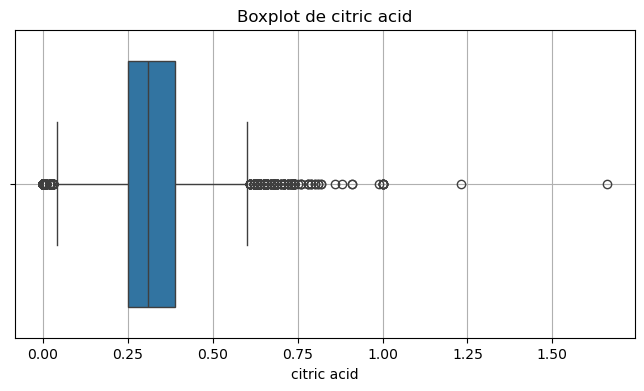

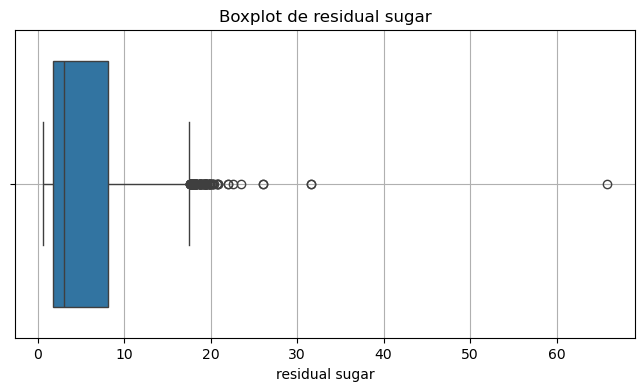

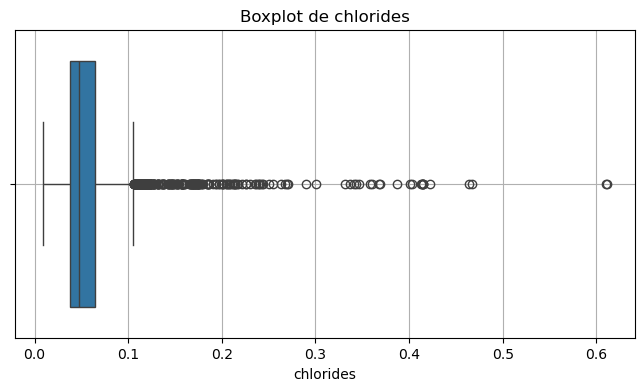

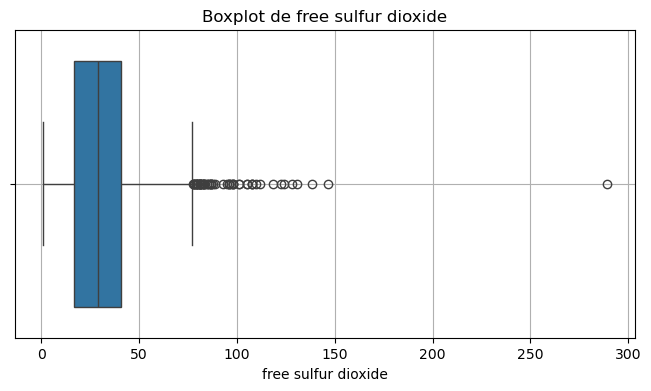

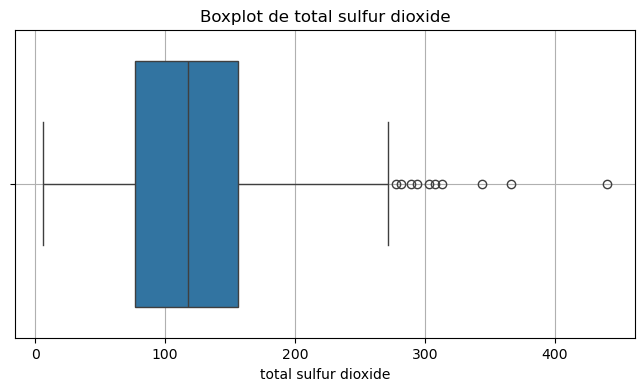

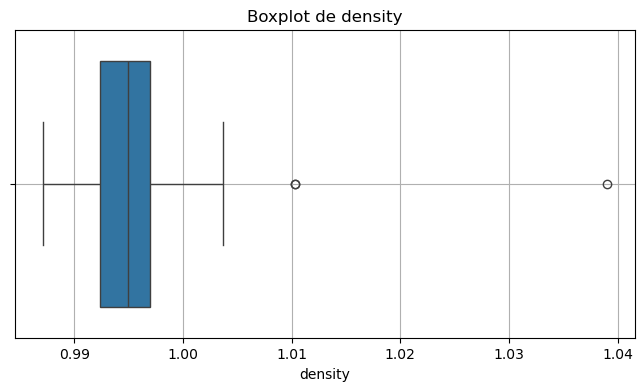

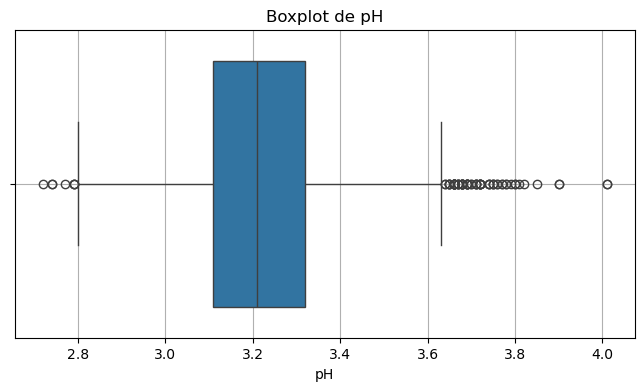

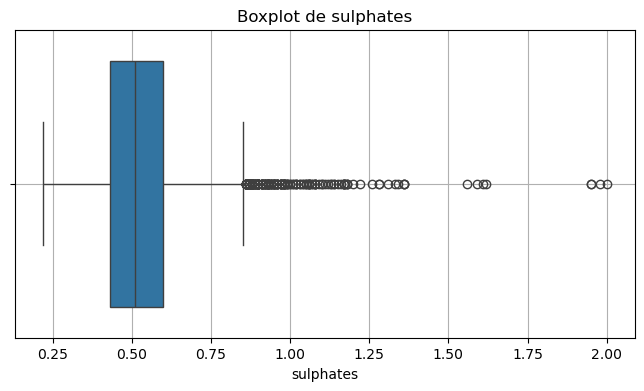

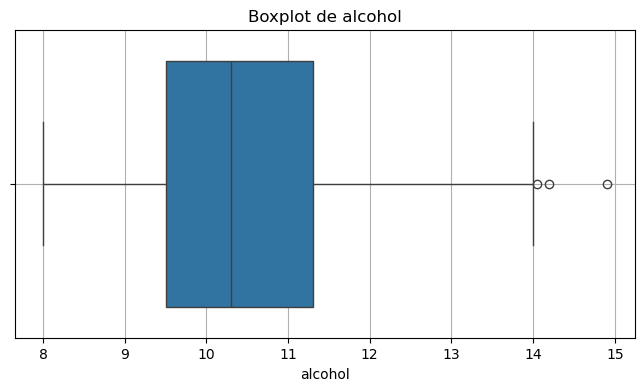

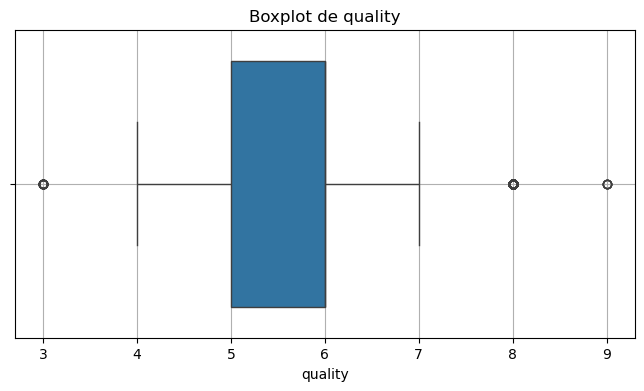

In [ ]:
# Podemos hacer box plot, para averiguar los outliers de cada columna 

# Filtramos solo columnas numéricas
numeric_cols = df_wine.select_dtypes(include='number').columns
print(numeric_cols)
# Creamos un boxplot para cada columna numérica
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_wine[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [ ]:
# SOLUCIÓN 1

#Hacemos la limpieza de los valores atípicos

# Para cada columa eliminamos los que se pasan por encima, o los que se pasan por debajo 
# El resultado es un nuevo DataFrame sin valores atípicos extremos

datos_limpios = df_wine.copy()

# Se seleccionan solo las columnas numéricas 
#  
# porque los outliers solo tienen sentido en datos numéricos.
columnas_numericas = datos_limpios.select_dtypes(include='number').columns

# Filtrar outliers en cada columna
for columna in columnas_numericas:
    q1 = datos_limpios[columna].quantile(0.25) # el 25% de los datos están por debajo de este valor.
    q3 = datos_limpios[columna].quantile(0.75) # el 75% de los datos están por debajo de este valor.
    rango_intercuartilico = q3 - q1 # Este rango contiene el 50% central de los datos (desde Q1 hasta Q3).
    
    limite_inferior = q1 - 1.5 * rango_intercuartilico  # Límite inferior permitido
    limite_superior = q3 + 1.5 * rango_intercuartilico  # Estos límites se usan para detectar valores demasiado bajos o altos 
    #que están muy lejos del centro.



    datos_limpios = datos_limpios[
        (datos_limpios[columna] >= limite_inferior) & 
        (datos_limpios[columna] <= limite_superior)
    ]

# Reiniciar índices
datos_limpios.reset_index(drop=True, inplace=True)

In [6]:
# SOLUCIÓN 2: Detección de outliers mediante una función que recibe un df como parámetro

def drop_outliers(df):
    # Detectar columnas numéricas
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
    num_cols = df.select_dtypes(include='number').columns

    # Calcular Q1, Q3 e IQR solo sobre columnas numericas, los cuantiles lo vemos en el df_wines.describe().
    q1  = df[num_cols].quantile(0.25)
    q3  = df[num_cols].quantile(0.75)
    iqr = q3 - q1


    # Devuelve true si es outlier
    outliers = (df[num_cols] < (q1 - 1.5 * iqr)) | (df[num_cols] > (q3 + 1.5 * iqr))

    # Devuelve las filas outlier
    filas_outlier = outliers.any(axis=1)

    # Serie con los índices de las filas outlier 
    idx_outliers = df.index[filas_outlier]

    # Borrado de los outliers
    delete_outliers = df.drop(index=idx_outliers)

    # Reseteo de los índices del df
    df_clean = delete_outliers.reset_index(drop=True) 

    #retornamos el df limpio
    return df_clean


In [7]:
# LLamamos a la función previamente creada y para que haga una limpia de los datos atípicos
# y de paso que los nombres de columnas del dataFrame no tenga espacios para que en la parte
# de sql sea más sencillo

df_wine = drop_outliers(df_wine)
df_wine = (
    df_wine
    .rename(
        columns=lambda x: (
            x.replace(' ', '_')
             .lower()
             .strip()
             
        )
    )
)

In [8]:
#Comprobamos que el número de registros no es el mismo.
df_wine.shape

(4840, 13)

# Apartado 4. 
## Almacenar los datos limpios en SQLite.
- Usa SQLite para almacenar el dataframe limpio en una base de datos persistente.
- Sigue la documentación oficial de SQLite: [SQLite Python Documentation](https://docs.python.org/3/library/sqlite3.html).'''

In [9]:

# Abrimos (o creamos) la base de datos 'wines.db' en disco y devuelve una conexión
con = sqlite3.connect('wines.db')

# Volcamos el DataFrame df_wine a una tabla en esa base de datos
df_wine.to_sql(
    name='data_wines', # nombre de la tabla en la BBDD donde se guardarán los datos
    con=con, # conexión SQLite que acabamos de abrir
    if_exists='replace', # Si la tabla ya existe, la borra y la vuelve a crear
    index=False # No escribe la columna de índice del DataFrame como campo adicional
) 

4840

# Apartado 5.
## Realizar 3 consultas en SQLite
Basándote en los datos y las columnas del dataset, realiza las siguientes consultas:



#### Respuesta: 
Hemos realizado las consultas mediante querys en SQL.

In [10]:
nombre_tabla='data_wines'
#🔹 Declaramaos la conexion hacia la base de datos

#🔹 Declaramos el cursor para recorrer la base de datos mediante querys
cur = con.cursor()

#### Consulta 1: ¿Cuál es el promedio de calidad (`quality`) por tipo de vino (`type`)?

In [11]:
# 🔹 Declaracion de la variable para la query1

query1=f"SELECT type,avg(quality) FROM {nombre_tabla} group by type "

#🔹 Lanzamos la query en un bucle for controlada con exepciones
try:
    for row in cur.execute(query1):
        print(row)
except:
    print("Error no se puede realizar la consulta 1")


('red', 5.656891495601173)
('white', 5.848244348244348)


#### Consulta 2: ¿Cuántos vinos tienen un nivel de alcohol superior a 10.5, agrupados por tipo? 

In [12]:

#🔹 Declaracion de la variable para la query2

query2=f"SELECT type, count(alcohol) FROM {nombre_tabla} WHERE alcohol > 10.5 group by type "

#🔹 Lanzamos la query en un bucle for controlada con exepciones
try:
    for row in cur.execute(query2):
        print(row)
except:
    print("Error no se puede realizar la consulta 2")

('red', 257)
('white', 1902)


#### Consulta 3: Obtén el conteo de vinos por nivel de acidez (`fixed acidity`) agrupados en rangos (por ejemplo, de 0-5, 5-10, 10-15).

In [ ]:
# 🔹 Declaracion de la variable para la query1

query3=F"""SELECT Type,
                CASE 
                    WHEN `fixed acidity` > 0 AND `fixed acidity` <= 5  THEN 'Rango 1'
                    WHEN `fixed acidity` >= 5 AND `fixed acidity` <= 10 THEN 'Rango 2'
                    WHEN `fixed acidity` >= 10 AND `fixed acidity` <= 15 THEN 'Rango 3'
                    WHEN `fixed acidity` >= 15 THEN  'Range 4'
                END,
                count(`fixed acidity`)             
        FROM {nombre_tabla}
        GROUP BY
                CASE 
                    WHEN `fixed acidity` > 0 AND `fixed acidity` <= 5  THEN 'Rango 1'
                    WHEN `fixed acidity` >= 5 AND `fixed acidity` <= 10 THEN 'Rango 2'
                    WHEN `fixed acidity` >= 10 AND `fixed acidity` <= 15 THEN 'Rango 3'
                    WHEN `fixed acidity` >= 15 THEN  'Range 4'
                END 
        """

#🔹 Lanzamos la query en un bucle for controlada con exepciones
try:
    for row in cur.execute(query3):
        print(row)
except:
    print("Error no se puede realizar la consulta 3")

Error no se puede realizar la consulta 3


# Apartado 6.  
## Exportar datos a JSONLines.
De cara a una potencial insercion en una base de datos noSQL como `mongoDB`, podemos servirnos de pandas para preparar los datos. 
- ¿Qué estructura de datos de python es la más similar a un documento noSQL? 
- Usa Pandas para transformar los datos de una de las consultas en un archivo JSONLines.
- Usa la librería `jsonlines` para guardar el archivo.
- ¿Qué problemas podrían surgir al transformar un dataframe en jsonlines? 
- Añade una columna que sea originalmente un `np.array`,¿qué sucede al transformarlo en jsonlines? 
- Añade una columna que sea originalmente un `pd.datetime`,¿qué sucede al transformarlo en jsonlines?

In [ ]:
# - ¿Qué estructura de datos de python es la más similar a un documento noSQL? 
# - La estructura similar a un documento noSQL es el diccionario de Python, como por ejemplo:
example = {
    "type": "red",
    "alcohol": 10.4,
    "quality": 6,
    "features": {
        "pH": 3.51,
        "sulphates": 0.56
    }
}

In [ ]:
# Instalamos jsonlines

!pip install jsonlines

- Usamos Pandas para transformar los datos de esta consulta en un archivo JSONLines.
- Usa la librería `jsonlines` para guardar el archivo.
- ¿Qué problemas podrían surgir al transformar un dataframe en jsonlines? -> <strong>Principalmente puede haber fallos por tipos de datos no estándar</strong> 

In [ ]:
# Cargamos esta query en un Dataframe

con = sqlite3.connect("wines.db")
cur = con.cursor()
df = pd.read_sql_query("""
    SELECT
      type,
      COUNT(*) AS num_vinos_alto_alcohol
    FROM data_wines
    WHERE alcohol > 10.5
    GROUP BY type;
""", con)
con.close()

,type,num_vinos_alto_alcohol
0,red,257
1,white,1902


In [ ]:
# Intentamos guardar el DataFrame directamente en JSONLines
try:
    with jsonlines.open("data/consulta_jsonlines.jsonl", "w") as w:
        w.write(df)
    print("Consulta guardada en jsonlines")
except TypeError as e:
    print("Error:", e)

Error: Object of type DataFrame is not JSON serializable


- Si intentamos convertirlo directamente a JSONlines nos da error.
- El error nos indica que un objeto tipo <strong>DataFrame no es un JSON serializable.</strong>
- Revisando documentación, la respuesta a esto es porque <strong>JSON solo maneja tipos “nativos” de Python.</strong> <br />
- La solución sería convertir el DataFrame en una lista de diccionarios.

In [57]:
# Solución
# Convertimos el DataFrame en una lista de diccionarios,
# donde cada diccionario representa una fila (un "documento" JSON).
records = df.to_dict(orient="records")

# Intentamos crear/abrir el fichero JSONLines
try:
    # Crea o abre el archivo en modo escritura ("w") usando jsonlines.
    # with garantiza que se cierre correctamente al terminar.
    with jsonlines.open("data/consulta_jsonlines.jsonl", "w") as w:
    
    # Escribe todos los registros (la lista de dicts) en el archivo, uno por línea en formato JSON.
        w.write_all(records)
        
    # Si funciona lo imprimimos
    print("Consulta guardada en jsonlines")

# Si no funciona imprimimos el error TypeError en caso de encontrar un tipo no serializable
except TypeError as e:
    # En caso de no funcionar mostramos el mensaje de error para saber qué ha fallado
    print("Error:", e)


Error: Object of type Timestamp is not JSON serializable


- Añadimos la columna np.array.
- Primero vamos a capturar qué pasa con el np.array al transformar a jsonlines.
- Está hecho por separado porque JSONLines no acumula errores, sale en el primer fallo, así se puede ver exactamente qué error da en cada caso.

In [ ]:
# Tenemos la query a mano

con = sqlite3.connect("wines.db")
cur = con.cursor()
df = pd.read_sql_query("""
    SELECT
      type,
      COUNT(*) AS num_vinos_alto_alcohol
    FROM data_wines
    WHERE alcohol > 10.5
    GROUP BY type;
""", con)
con.close()

In [ ]:
# Para cada valor x construimos directamente el array [x, int(x*1.1)]
df["array"] = df["num_vinos_alto_alcohol"].apply(lambda x: np.array([x, int(x * 1.1)]))


,type,num_vinos_alto_alcohol,array
0,red,257,"[257, 282]"
1,white,1902,"[1902, 2092]"


In [ ]:
# Como hemos visto antes y en la documentación hay que convertir el Dataframe en una lista de diccionarios (uno por fila).
# Cada dict tiene clave=nombre_columna, valor=contenido de la celda.
records = df.to_dict(orient="records")

# Intentamos escribir esos registros en un archivo JSONLines
try:
    # Crea o abre el archivo en modo escritura ("w") usando jsonlines.
    # with garantiza que se cierre correctamente al terminar.
    with jsonlines.open("data/array_jsonlines.jsonl", "w") as w:
        # Escribe todos los registros (la lista de dicts) en el archivo, uno por línea en formato JSON.
        w.write_all(records)
# Si hay error lo capturamos
except TypeError as e:
    print("Error:", e)

Error: Object of type ndarray is not JSON serializable


- El error nos indica que un objeto tipo <strong>ndarray no es un JSON serializable.</strong>
- Como hemos visto antes la respuesta a esto es porque <strong>JSON solo maneja tipos “nativos” de Python.</strong> <br />
  Entonces como la estructura de un array es similar a la de una lista de Python, <strong>se debe convertir a lista antes de exportar a JSON</strong>

- Ahora vamos a capturar qué pasa con el datetime al transformar a jsonlines.

In [ ]:
# Dejamos a mano la query

con = sqlite3.connect("wines.db")
cur = con.cursor()
df = pd.read_sql_query("""
    SELECT
      type,
      COUNT(*) AS num_vinos_alto_alcohol
    FROM data_wines
    WHERE alcohol > 10.5
    GROUP BY type;
""", con)
con.close()
df

,type,num_vinos_alto_alcohol
0,red,257
1,white,1902


In [56]:
# Creamos una lista vacía donde acumularemos objetos datetime
dates = []

for i in range(len(df)):
    # Partimos de una fecha base: 1 de enero de 2025
    # Sumamos i días para tener una fecha distinta por fila
    dates.append(datetime(2025, 1, 1) + pd.Timedelta(days=i))
df["datetime"] = pd.to_datetime(dates)


# Convertimos el DataFrame `df` en una lista de diccionarios,
# donde cada elemento representa una fila (un "documento" JSON).
records = df.to_dict(orient="records")

#Crea o abre el archivo en modo escritura ("w") usando jsonlines.
# with garantiza que se cierre correctamente al terminar.
try:
    with jsonlines.open("data/datetime_jsonlines.jsonl", "w") as w:
        w.write_all(records)
# Captura de error
except TypeError as e:
    print("Error", e)

Error Object of type Timestamp is not JSON serializable


- El error nos indica que un objeto tipo <strong>Timestamp no es un JSON serializable.</strong> Como en los ejemplos anteriores, JSON maneja tipos naticvos de Python. <strong>Hay que pasarlo a string.</strong><br />

<strong>Solución. Convertir el array a lista y Timestamp a string.</strong>

In [ ]:
# Tenemos la query a mano

con = sqlite3.connect("wines.db")
cur = con.cursor()
df = pd.read_sql_query("""
    SELECT
      type,
      COUNT(*) AS num_vinos_alto_alcohol
    FROM data_wines
    WHERE alcohol > 10.5
    GROUP BY type;
""", con)
con.close()
df

,type,num_vinos_alto_alcohol
0,red,257
1,white,1902


In [ ]:
# Para cada valor x construimos directamente el array [x, int(x*1.1)]
df["array"] = df["num_vinos_alto_alcohol"].apply(lambda x: np.array([x, int(x * 1.1)]))

# Convertir arrays a listas
df["array"] = df["array"].apply(lambda x: x.tolist())

# Crear las fechas para luego añadirlas
fechas = []
for i in range(len(df)):
    fechas.append(datetime(2025, 1, 1) + pd.Timedelta(days=i))

# Convertir la lista de datetimes de Python a pandas.to_datetime    
df["exported_at"] = pd.to_datetime(fechas)

# Formatear la fecha como string en "%Y-%d-%m"
df["exported_at"] = df["exported_at"].dt.strftime("%Y-%d-%m")

# Convertir el Dataframe a una lista de diccionarios Python
records_fixed = df.to_dict(orient="records")

# Crea o abre el archivo en modo escritura ("w") usando jsonlines.
# with garantiza que se cierre correctamente al terminar.
try:
    with jsonlines.open("data/df_to_jsonlines.jsonl", "w") as w:
        w.write_all(records_fixed)
except Exception as e:
    # Captura de errores
    print("Error:", e)
else:
    print("df_to_jsonlines guardado")
    print(df)

df_to_jsonlines g
    type  num_vinos_alto_alcohol         array exported_at
0    red                     257    [257, 282]  2025-01-01
1  white                    1902  [1902, 2092]  2025-02-01


# Apartado 7. 
## Análisis de calidad de los vinos (ML)
- Inspecciona qué caracteriza a los vinos tintos y blancos con mayor calidad (`quality`).
- Usa análisis estadístico, gráficos o cualquier técnica que consideres relevante para identificar patrones. 

'''

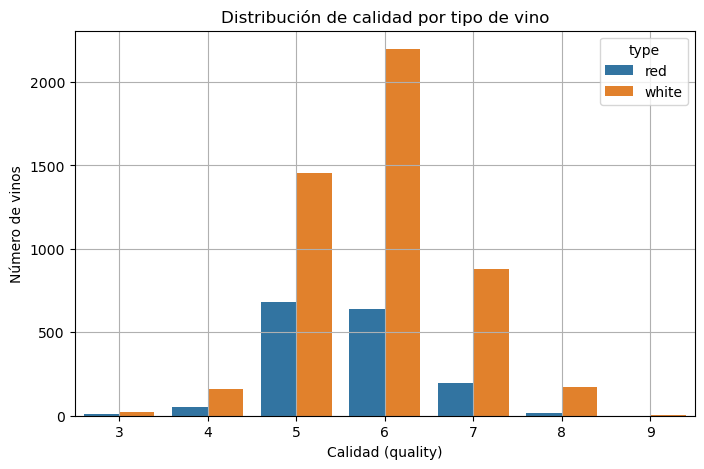

In [ ]:
# Distribuccion de calidad entre blancos y tintos 


# Gráfico de distribución
plt.figure(figsize=(8,5))
sns.countplot(data=df_wine, x='quality', hue='type')
plt.title('Distribución de calidad por tipo de vino')
plt.xlabel('Calidad (quality)')
plt.ylabel('Número de vinos')
plt.grid(True)
plt.show()

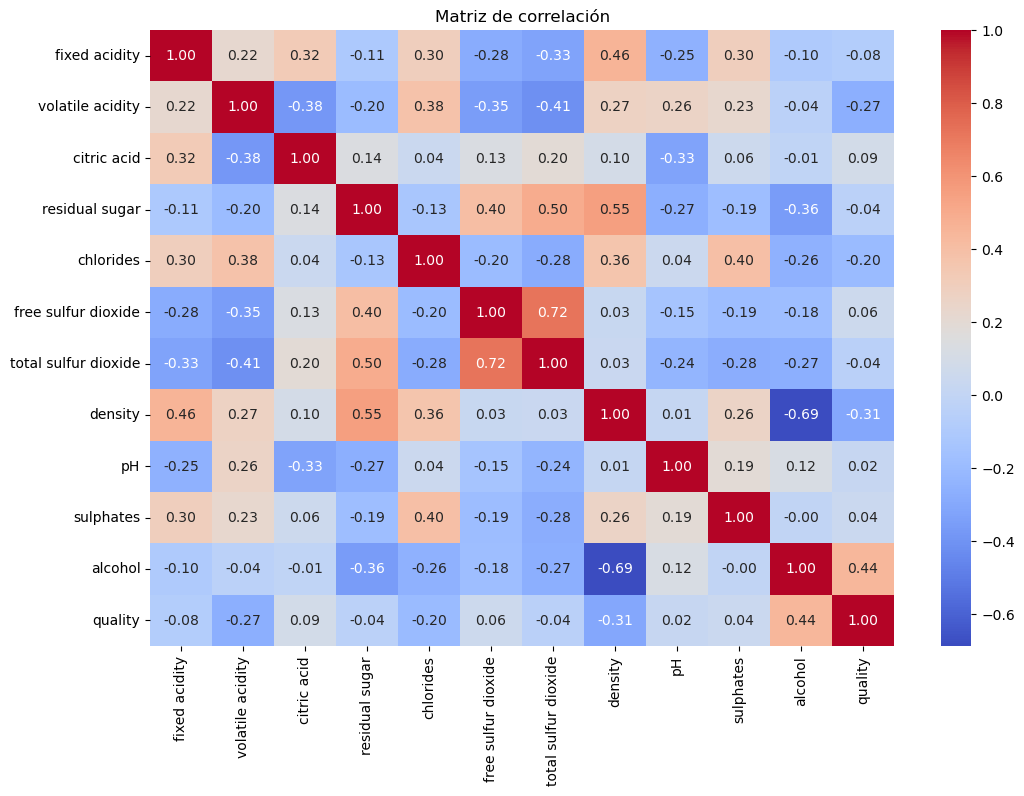

In [ ]:
# esta es la matriz de correlacion que es muy interesante para proyectos ML donde hay que sacar las columnas que mas dependen de la target, solo nos 
# selecciona las numericas
df_corr = df_wine.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

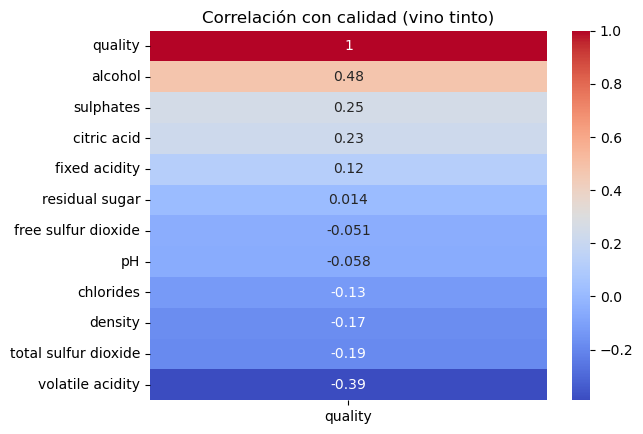

In [ ]:
# Correlacion para tintos

# Correlación para tintos
corr_red = df_wine[df_wine['type'] == 'red'].corr(numeric_only=True)
sns.heatmap(corr_red[['quality']].sort_values(by='quality', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con calidad (vino tinto)')
plt.show()

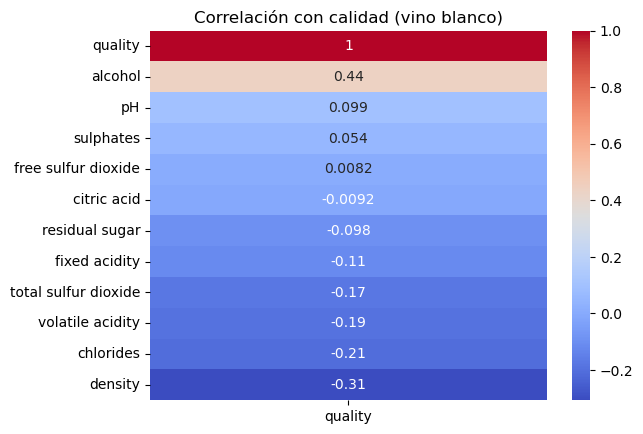

In [ ]:
# Correlación para blancos
corr_red = df_wine[df_wine['type'] == 'white'].corr(numeric_only=True)
sns.heatmap(corr_red[['quality']].sort_values(by='quality', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con calidad (vino blanco)')
plt.show()

In [ ]:
# Esto es un apartado algo mas complicado, he podido investigar como hacerlo y he visto esta manera para poder crear un radar para ver 
# cada vino las columnas de las que depende
# Quiero crear un radar para que visualmente podamos comparar que principios son los mas importante en la determinacion de 
# calidad


# Obtener correlaciones con 'quality'
corr_red = df_wine[df_wine['type'] == 'red'].corr(numeric_only=True)['quality']
corr_white = df_wine[df_wine['type'] == 'white'].corr(numeric_only=True)['quality']

# Quitamos la fila de 'quality' (correlación consigo misma)
corr_red = corr_red.drop('quality')
corr_white = corr_white.drop('quality')

# Tomamos las mismas columnas (por si alguna difiere)
labels = corr_red.index
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

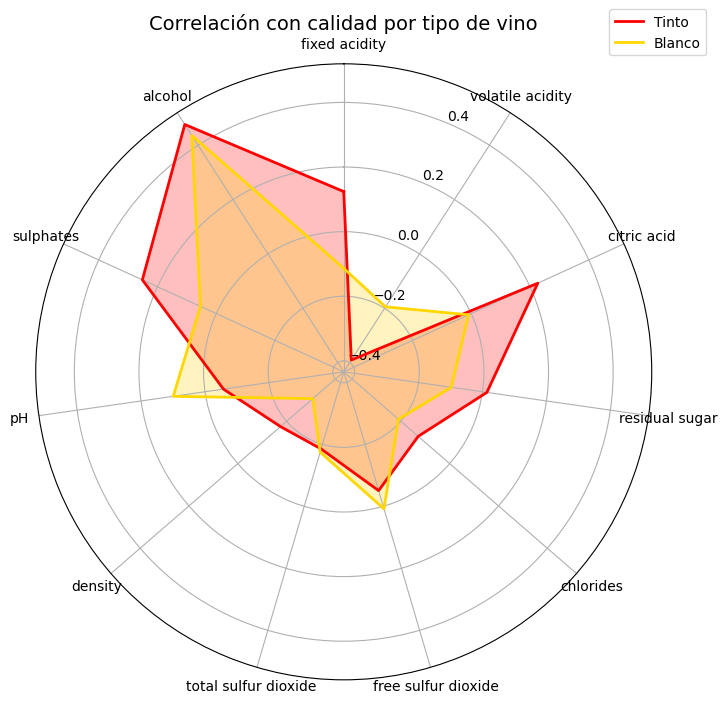

In [ ]:
# Convertimos los valores a listas y los cerramos para formar el círculo
values_red = corr_red.values.tolist()
values_white = corr_white.values.tolist()
values_red += values_red[:1]
values_white += values_white[:1]

# Radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values_red, color='red', linewidth=2, label='Tinto')
ax.fill(angles, values_red, color='red', alpha=0.25)

ax.plot(angles, values_white, color='gold', linewidth=2, label='Blanco')
ax.fill(angles, values_white, color='gold', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.title('Correlación con calidad por tipo de vino', size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


In [ ]:
!pip freeze requirements.txt